In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


In [52]:
train_data_original = pd.read_csv('STEEL_TRAIN.csv')
test_data_original = pd.read_csv('STEEL_TEST.csv')

In [53]:
print(train_data_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [54]:
train_data_original.head()

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0   0        584        590     909972     909977            16            8   
1   1        808        816     728350     728372           433           20   
2   2         39        192    2212076    2212144         11388          705   
3   3        781        789    3353146    3353173           210           16   
4   4       1540       1560     618457     618502           521           72   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  ...  \
0            5               2274                    113  ...   
1           54              44478                     70  ...   
2          420            1311391                     29  ...   
3           29               3202                    114  ...   
4           67              48231                     82  ...   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  Pastry  Z_Scratch  \
0            -0.5000           -0.0104          0.1417       0          0   
1             0.7419           -0.2997          0.9491       0          0   
2            -0.0105           -0.0944          1.0000       0          0   
3             0.6667           -0.0402          0.4025       0          0   
4             0.9158           -0.2455          0.9998       0          0   

   K_Scatch  Stains  Dirtiness  Bumps  Other_Faults  
0         0       1          0      0             0  
1         0       0          0      0             1  
2         1       0          0      0             0  
3         1       0          0      0             0  
4         0       0          0      0             1  

[5 rows x 35 columns]

In [55]:
test_data_original.describe()

id     X_Minimum     X_Maximum     Y_Minimum     Y_Maximum  \
count  12814.000000  12814.000000  12814.000000  1.281400e+04  1.281400e+04   
mean   25625.500000    709.331356    753.274934  1.846533e+06  1.842029e+06   
std     3699.227509    531.878508    500.743570  1.916427e+06  1.911426e+06   
min    19219.000000      0.000000      4.000000  6.712000e+03  6.724000e+03   
25%    22422.250000     46.000000    214.000000  6.401738e+05  6.398570e+05   
50%    25625.500000    776.000000    796.000000  1.378890e+06  1.378588e+06   
75%    28828.750000   1152.000000   1167.000000  2.368032e+06  2.356238e+06   
max    32032.000000   1688.000000   1712.000000  1.298766e+07  1.298769e+07   

        Pixels_Areas   X_Perimeter   Y_Perimeter  Sum_of_Luminosity  \
count   12814.000000  12814.000000  12814.000000       1.281400e+04   
mean     1672.908225     96.459497     64.730607       1.926893e+05   
std      3725.518996    219.928548    188.506385       4.812871e+05   
min         4.000000      2.000000      2.000000       5.350000e+02   
25%        91.000000     15.000000     14.000000       9.968000e+03   
50%       169.000000     24.000000     24.000000       1.840200e+04   
75%       649.000000     64.000000     60.000000       6.696025e+04   
max    152655.000000  10449.000000  18152.000000       1.159141e+07   

       Minimum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  \
count           12814.000000  ...     12814.000000   12814.000000   
mean               84.548072  ...         0.030695       0.618650   
std                28.711574  ...         0.048663       0.220361   
min                 0.000000  ...         0.001500       0.014400   
25%                68.000000  ...         0.006600       0.455075   
50%                90.000000  ...         0.009500       0.638700   
75%               105.000000  ...         0.019075       0.785700   
max               203.000000  ...         0.747200       1.000000   

       Edges_Y_Index  Outside_Global_Index    LogOfAreas   Log_X_Index  \
count   12814.000000          12814.000000  12814.000000  12814.000000   
mean        0.833823              0.584985      2.472743      1.311689   
std         0.220306              0.483308      0.761108      0.467621   
min         0.066700              0.000000      0.778200      0.344400   
25%         0.666700              0.000000      1.959000      1.000000   
50%         0.967700              1.000000      2.227900      1.146100   
75%         1.000000              1.000000      2.814125      1.431400   
max         1.000000              1.000000      4.680200      2.938500   

        Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
count  12814.000000       12814.000000      12814.000000    12814.000000  
mean       1.388119           0.101164         -0.139516        0.572401  
std        0.401725           0.488127          0.117878        0.331974  
min        0.301000          -0.991000         -0.998900        0.119000  
25%        1.079200          -0.277800         -0.192600        0.257000  
50%        1.322200           0.111100         -0.143900        0.472900  
75%        1.707600           0.529400         -0.084300        0.999200  
max        4.258700           0.973900          0.591700        1.000000  

[8 rows x 28 columns]

In [56]:
train_data_original.shape

(19219, 35)

In [57]:
test_data_original.shape

(12814, 28)

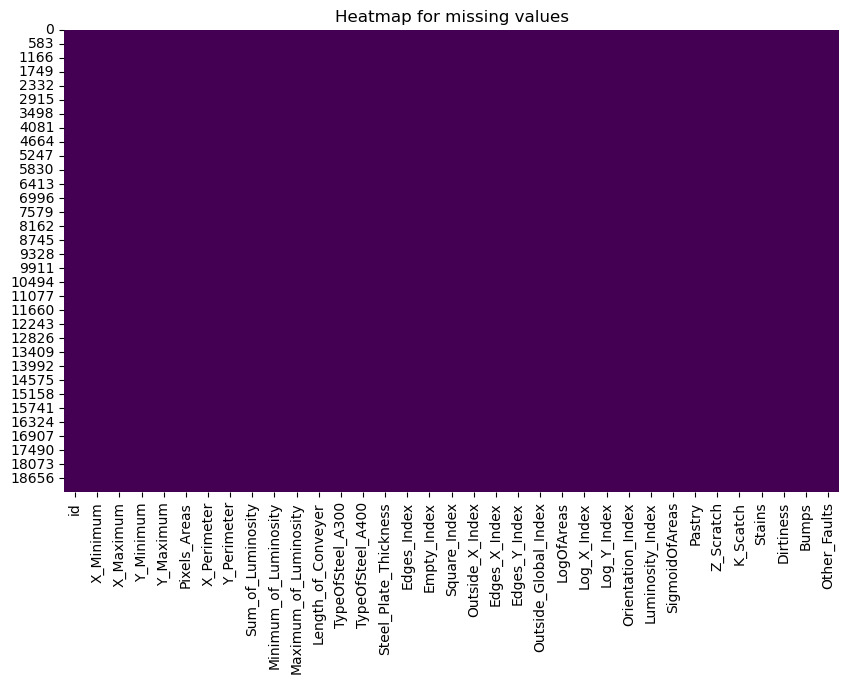

In [58]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data_original.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap for missing values')
plt.show()

In [59]:
test_data_original.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

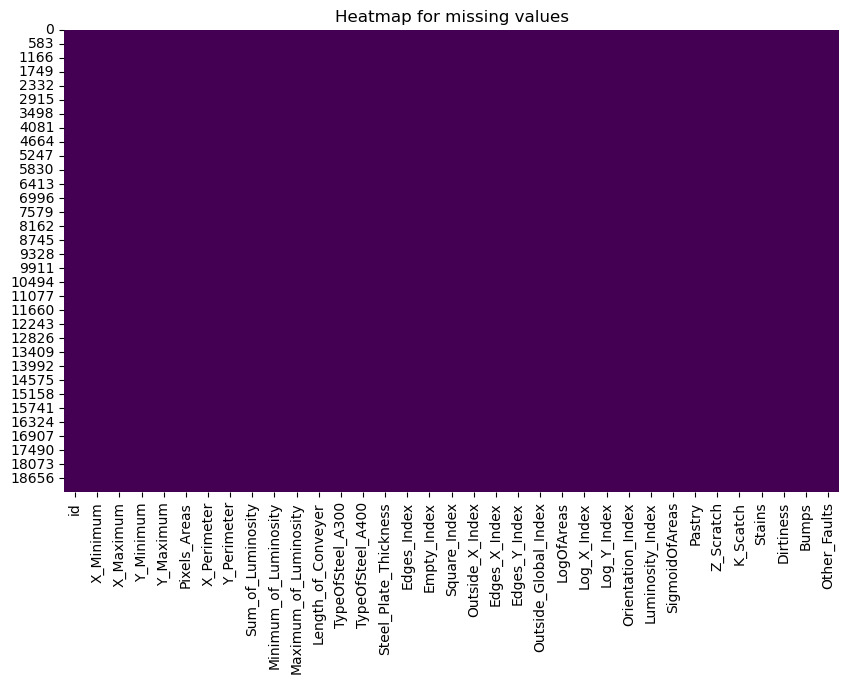

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data_original.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap for missing values')
plt.show()

In [61]:
target_variables=['Pastry','Z_Scratch', 'K_Scatch',   'Stains',   'Dirtiness','Bumps','Other_Faults']

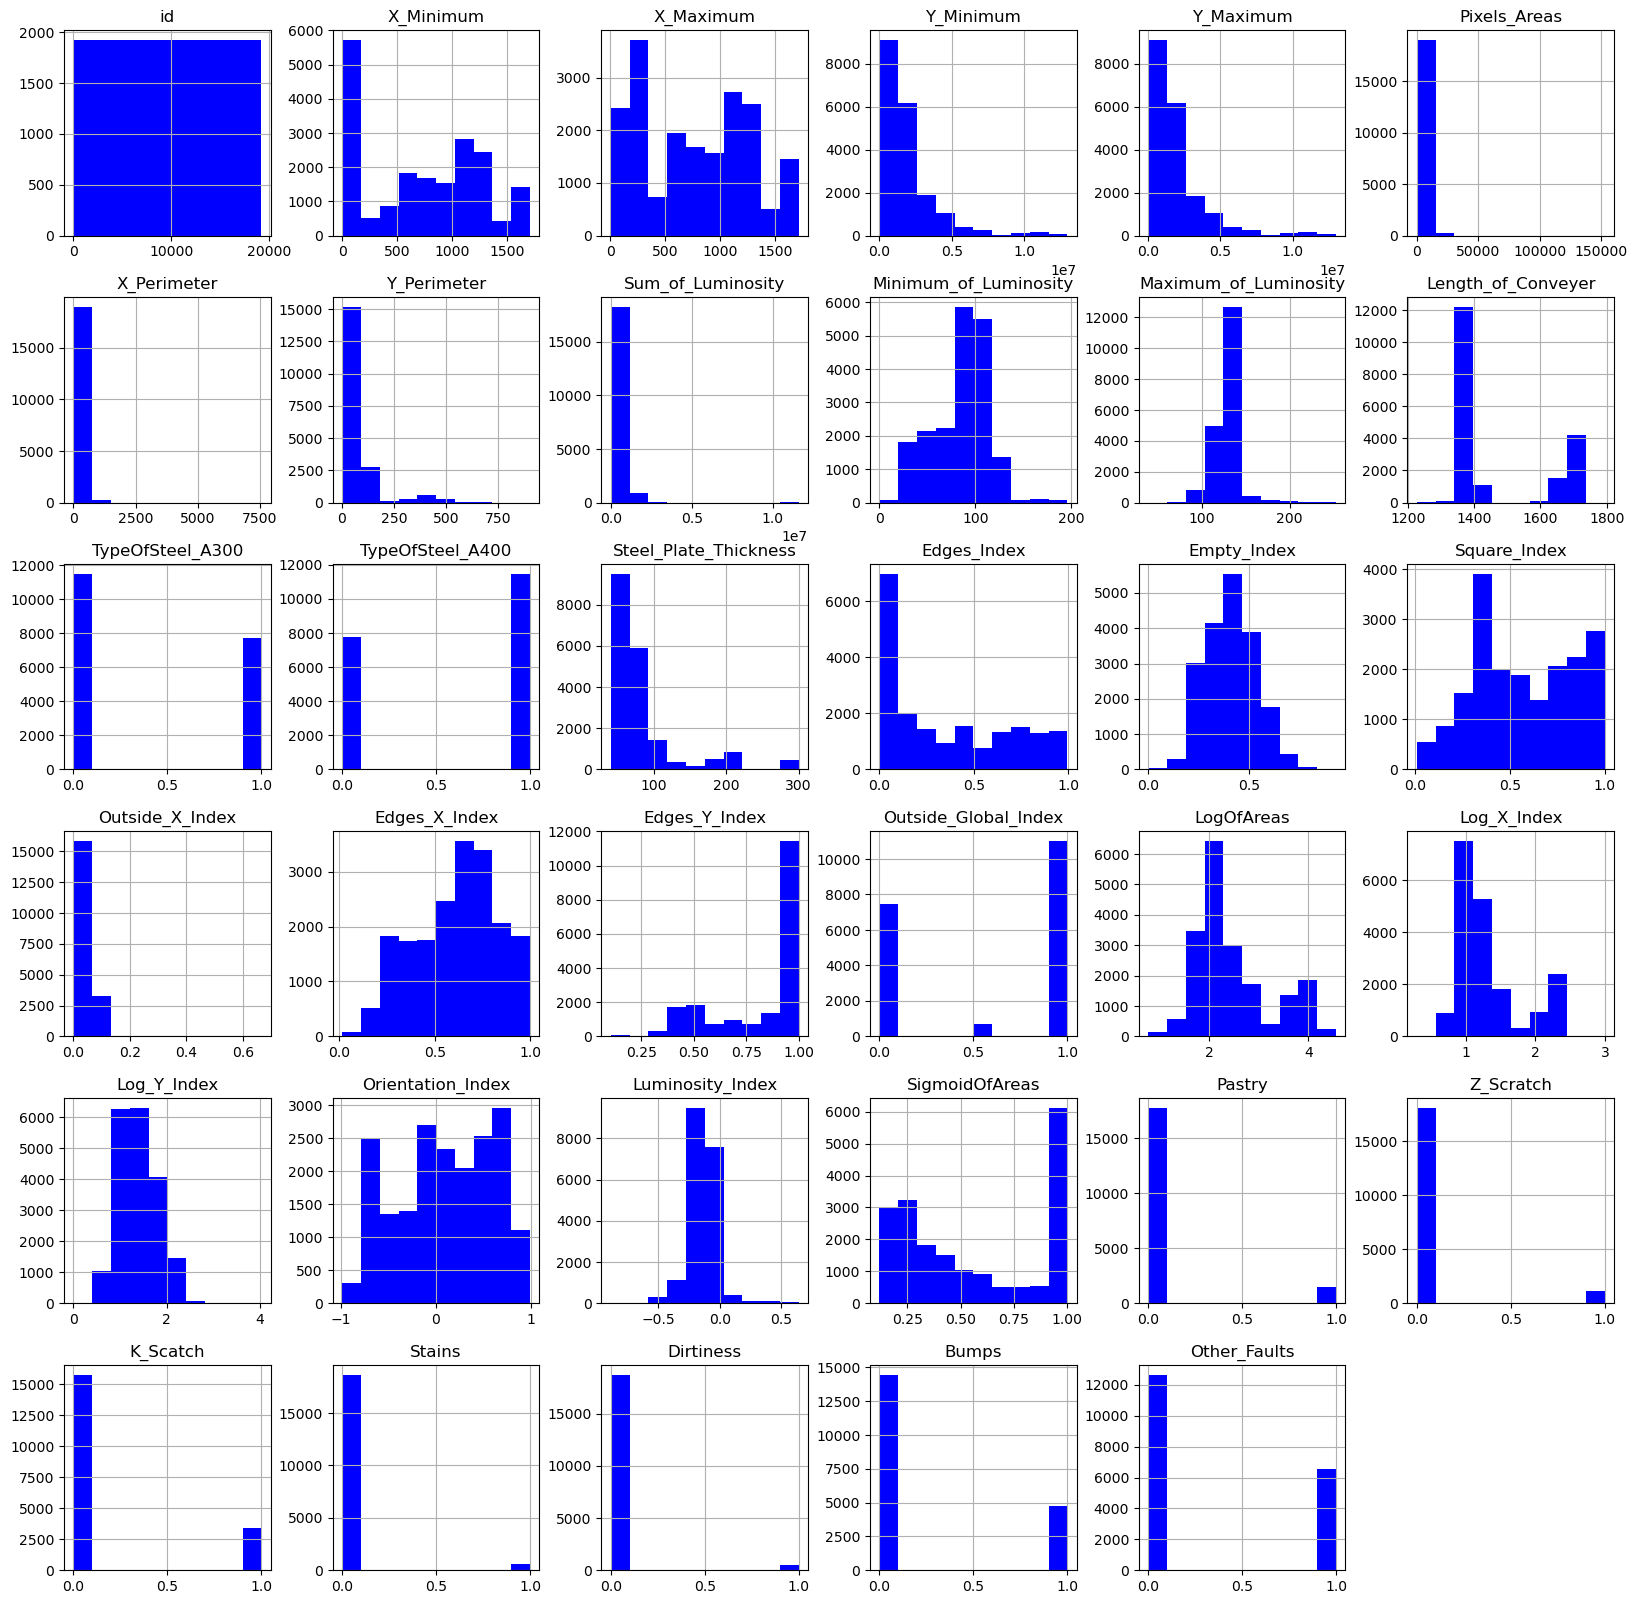

In [62]:
train_data_original.hist(figsize=(20,20),color = 'blue')
plt.show()

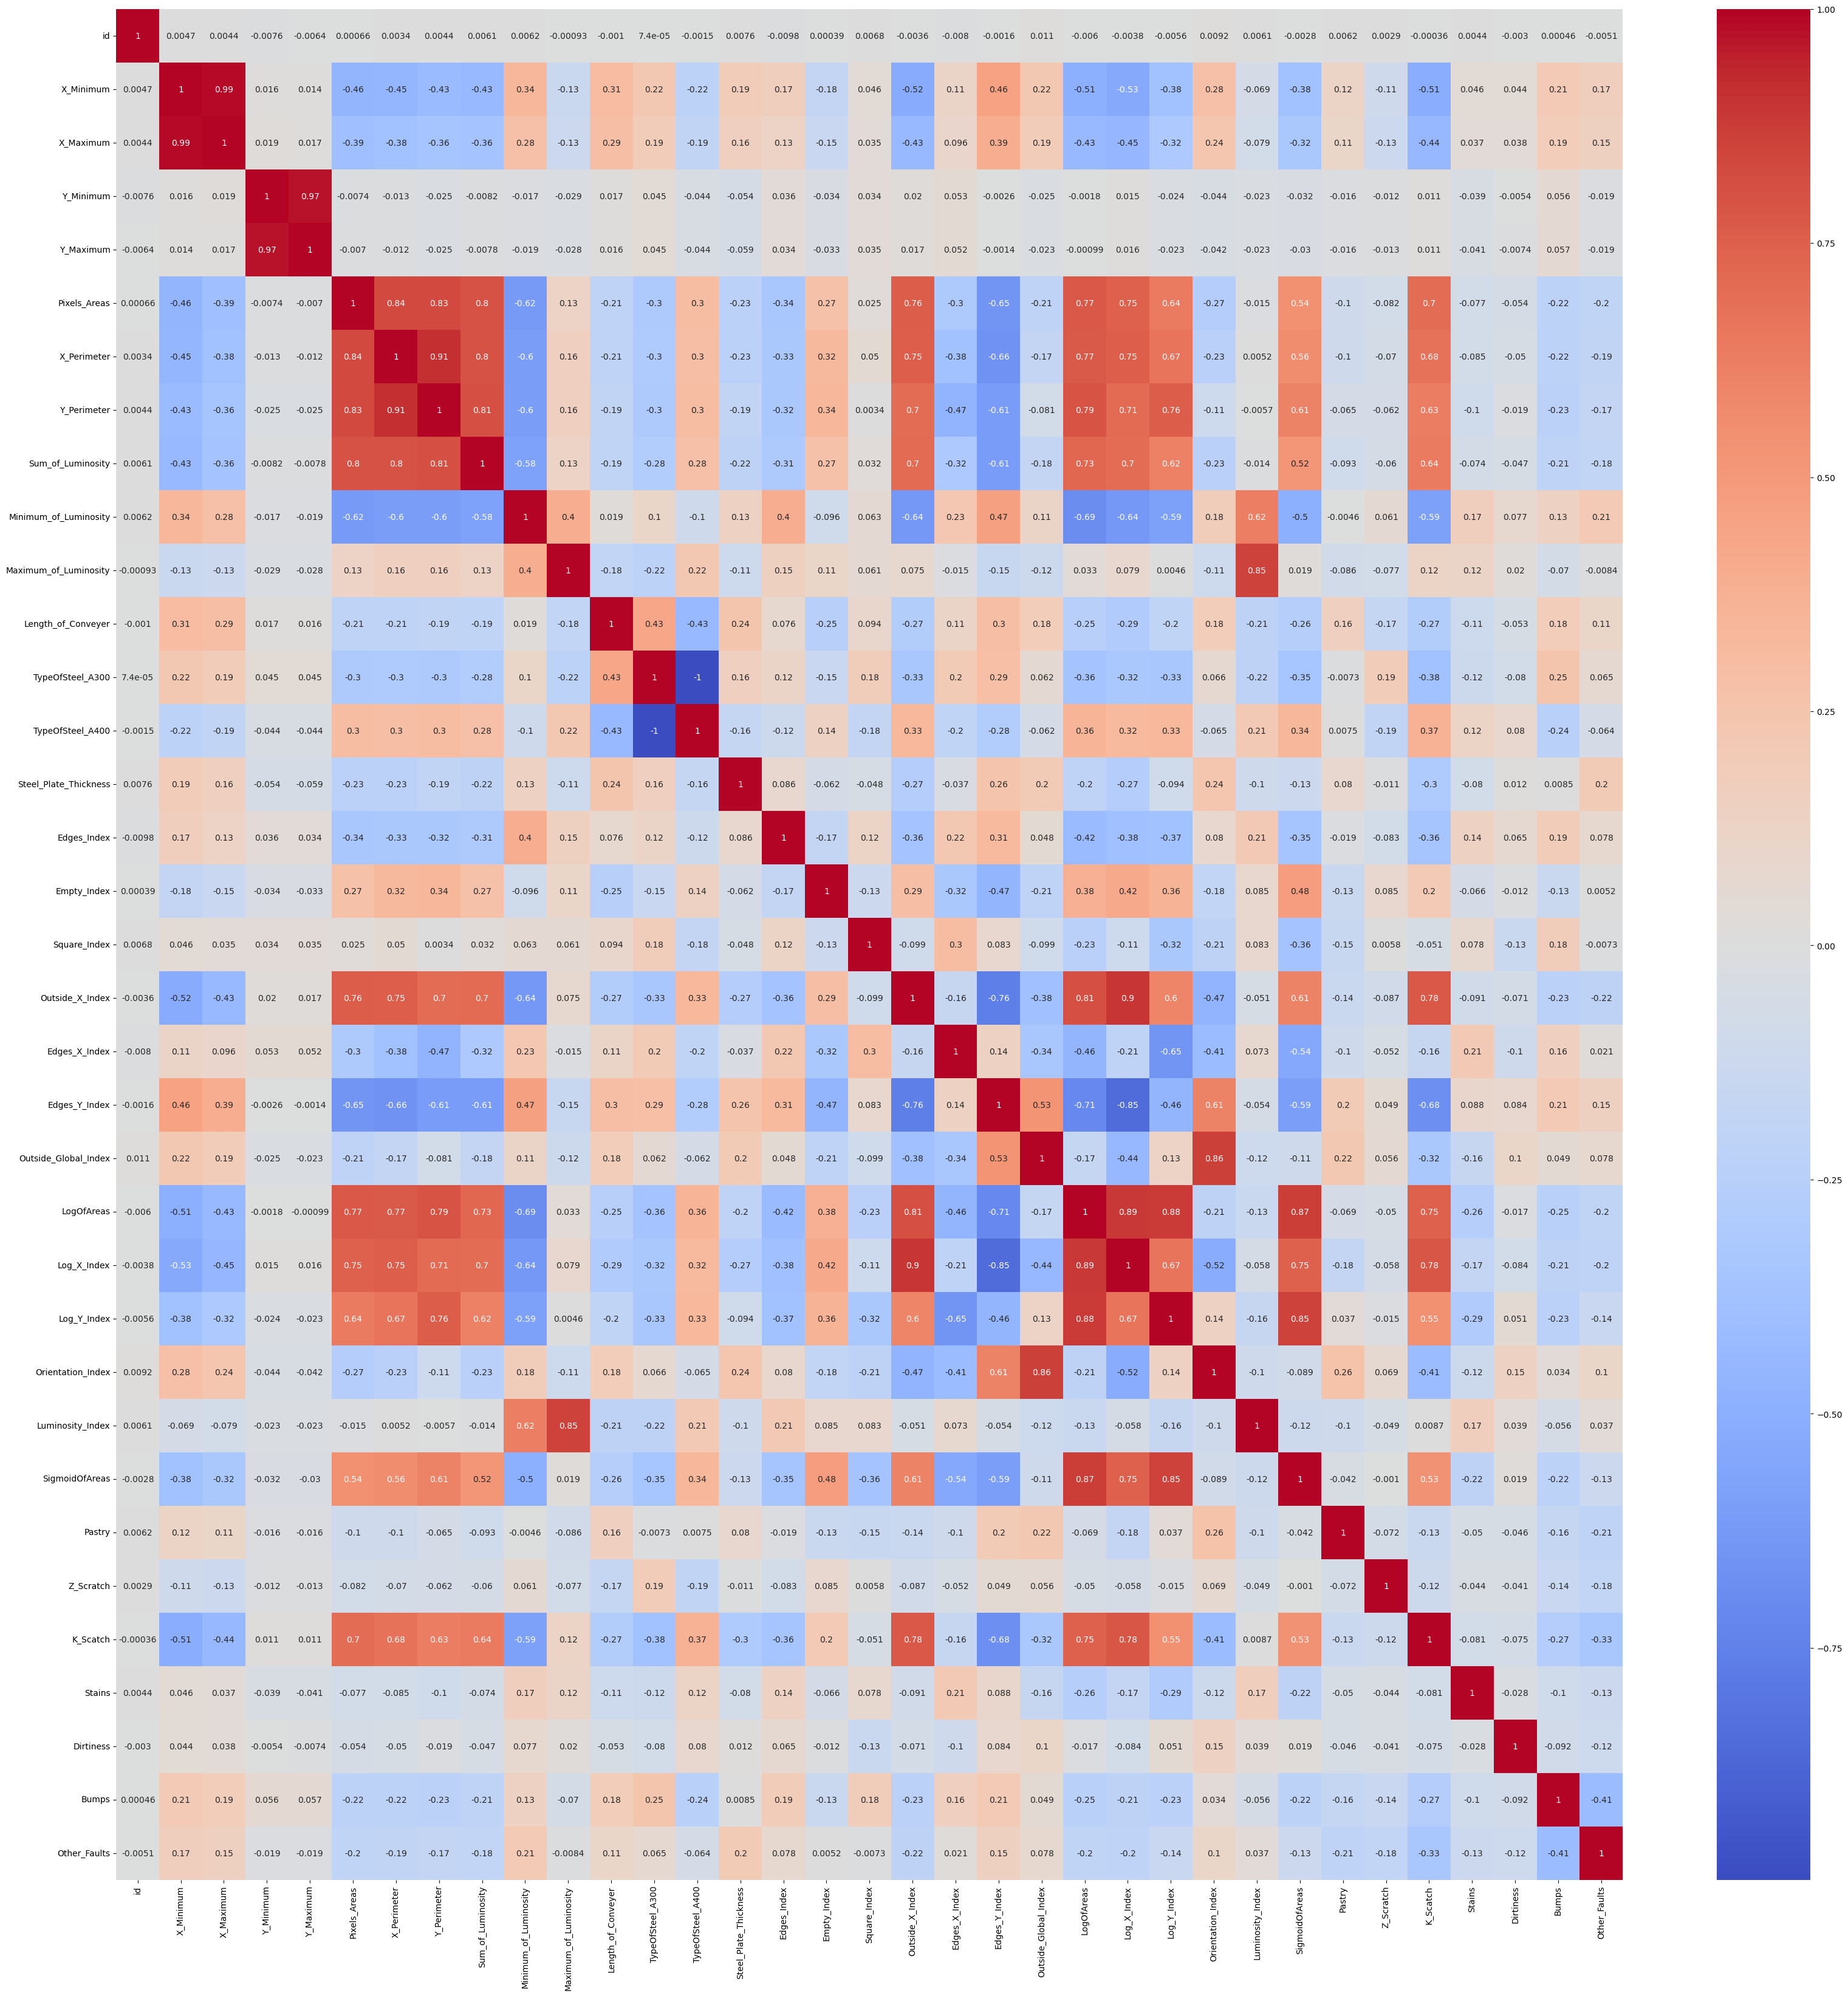

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40, 40))
corr_matrix = train_data_original.corr()  # Assuming df_train contains the modified dataframe after dropping necessary columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [64]:
# Filter the correlation matrix to identify pairs of features that have a high correlation
filtered_pairs = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]

# Get the column names
columns = filtered_pairs.columns

# Create a set to store unique pairs
unique_pairs = set()

# Iterate over the columns
for i, col in enumerate(columns):
    # Get the pairs for the current column
    current_pairs = filtered_pairs[col].dropna()
    
    # Exclude self-correlation
    current_pairs = current_pairs.drop(col, errors='ignore')
    
    # Check if the pair has already been added in a different order
    for j in range(i + 1, len(columns)):
        pair_col = columns[j]
        if pair_col in current_pairs.index:
            unique_pairs.add((col, pair_col, filtered_pairs.loc[pair_col, col]))
    
# Print the unique pairs with correlation coefficients
for pair in unique_pairs:
    print(f"Pair: {pair[0]}, {pair[1]}  |  Correlation: {pair[2]}")


Pair: Pixels_Areas, Outside_X_Index  |  Correlation: 0.7648097243096539
Pair: Minimum_of_Luminosity, Outside_X_Index  |  Correlation: -0.638549102535647
Pair: Y_Perimeter, LogOfAreas  |  Correlation: 0.7908629185691817
Pair: X_Minimum, Outside_X_Index  |  Correlation: -0.5221120993289088
Pair: X_Perimeter, SigmoidOfAreas  |  Correlation: 0.5612564255633062
Pair: Minimum_of_Luminosity, LogOfAreas  |  Correlation: -0.6914055710357231
Pair: Y_Perimeter, Log_Y_Index  |  Correlation: 0.7611173433977736
Pair: Outside_X_Index, K_Scatch  |  Correlation: 0.7788587198690256
Pair: Pixels_Areas, LogOfAreas  |  Correlation: 0.7745802697299347
Pair: Sum_of_Luminosity, Minimum_of_Luminosity  |  Correlation: -0.5808567671399145
Pair: X_Perimeter, Minimum_of_Luminosity  |  Correlation: -0.6038914689109365
Pair: X_Perimeter, Sum_of_Luminosity  |  Correlation: 0.8020724927380157
Pair: Edges_X_Index, SigmoidOfAreas  |  Correlation: -0.5386777959167549
Pair: X_Perimeter, K_Scatch  |  Correlation: 0.6750555

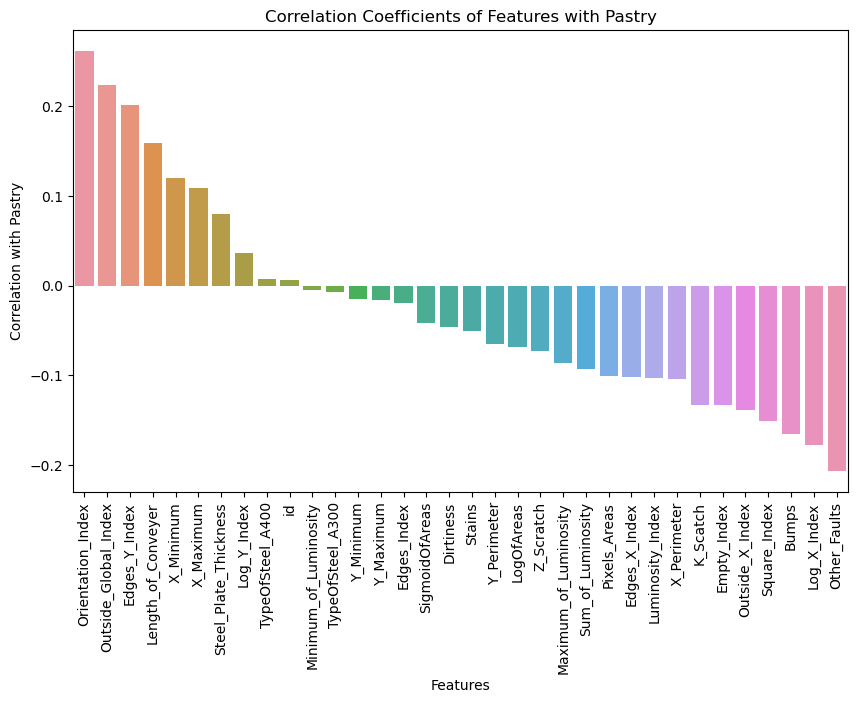

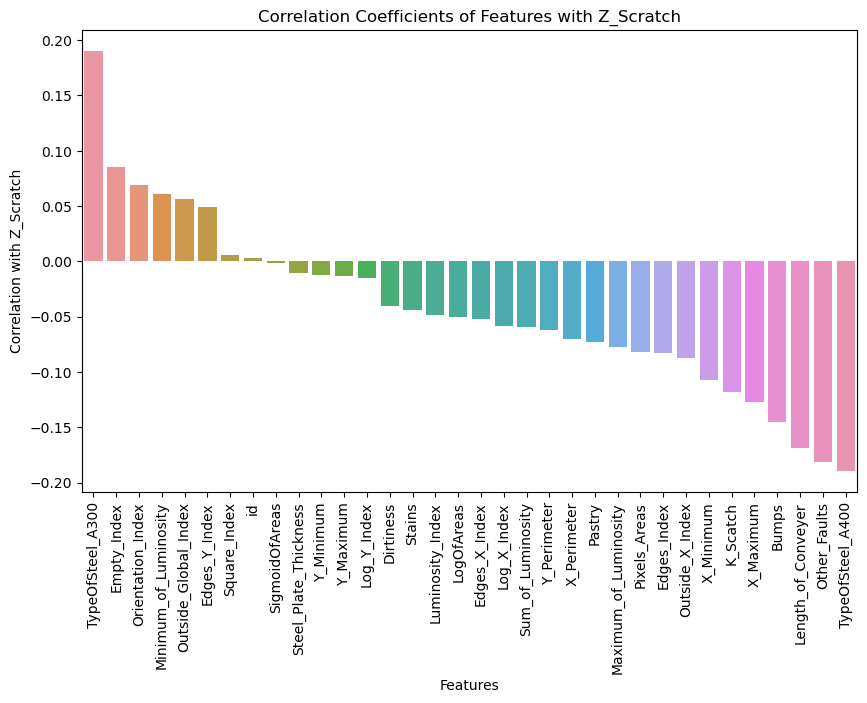

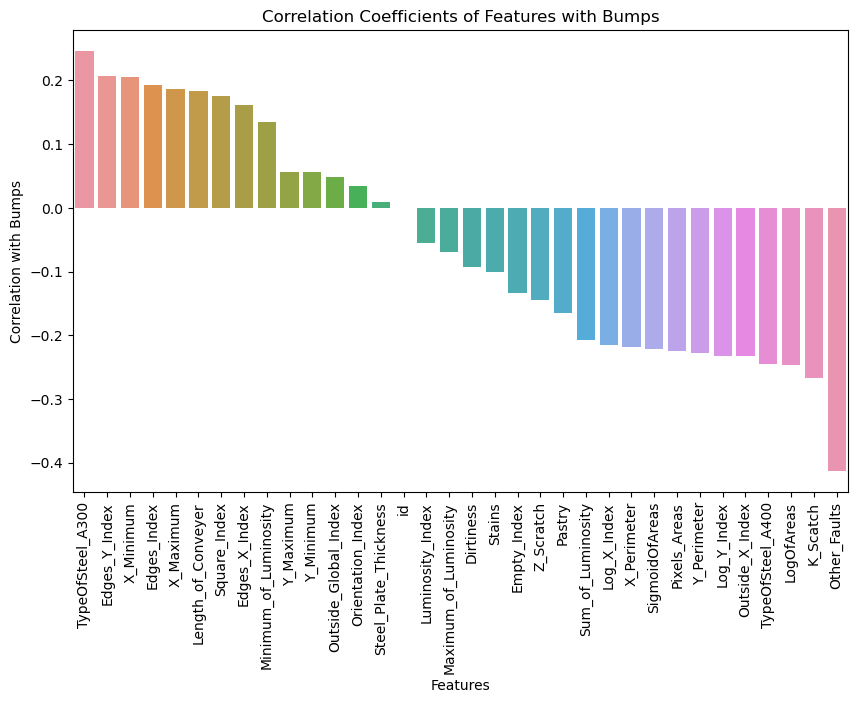

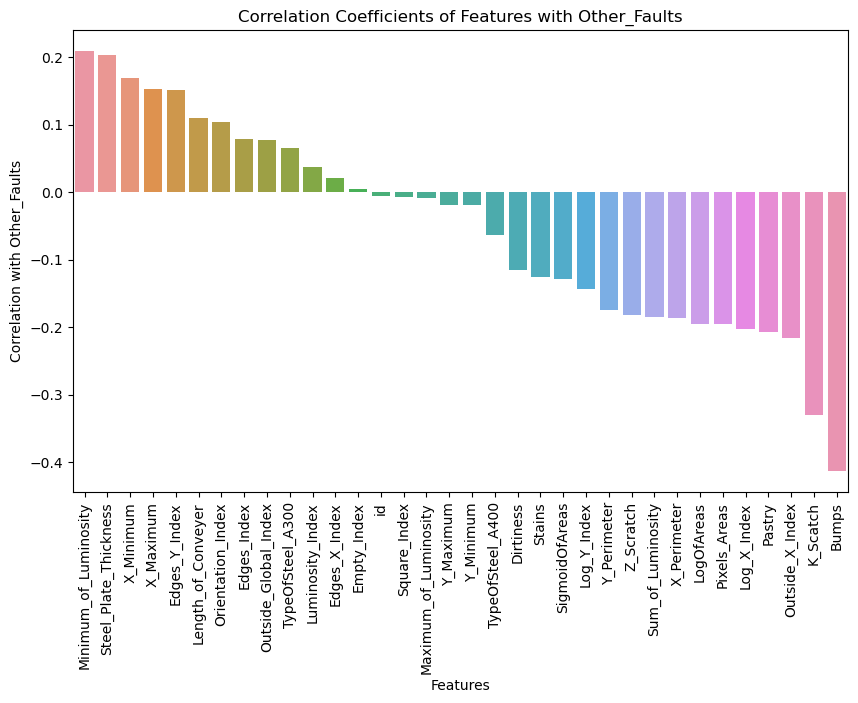

In [65]:
for target_variable in target_variables:
    corr_with_target = corr_matrix[target_variable].sort_values(ascending=False)[1:]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=corr_with_target.index, y=corr_with_target)
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel(f'Correlation with {target_variable}')
    plt.title(f'Correlation Coefficients of Features with {target_variable}')
    plt.show()


In [66]:
# display the correlation coefficients of all features with the target variable 'BuyEV'
corr_with_target

Minimum_of_Luminosity    0.208857
Steel_Plate_Thickness    0.202910
X_Minimum                0.169608
X_Maximum                0.153448
Edges_Y_Index            0.150978
Length_of_Conveyer       0.109370
Orientation_Index        0.104130
Edges_Index              0.078373
Outside_Global_Index     0.077869
TypeOfSteel_A300         0.064727
Luminosity_Index         0.037015
Edges_X_Index            0.021238
Empty_Index              0.005157
id                      -0.005091
Square_Index            -0.007282
Maximum_of_Luminosity   -0.008368
Y_Maximum               -0.018533
Y_Minimum               -0.019227
TypeOfSteel_A400        -0.063922
Dirtiness               -0.115800
Stains                  -0.125596
SigmoidOfAreas          -0.129298
Log_Y_Index             -0.142845
Y_Perimeter             -0.174581
Z_Scratch               -0.181566
Sum_of_Luminosity       -0.184651
X_Perimeter             -0.186234
LogOfAreas              -0.195268
Pixels_Areas            -0.195931
Log_X_Index   

In [67]:
y = train_data_original[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]
X = train_data_original.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis=1)


In [68]:
X.head()

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0   0        584        590     909972     909977            16            8   
1   1        808        816     728350     728372           433           20   
2   2         39        192    2212076    2212144         11388          705   
3   3        781        789    3353146    3353173           210           16   
4   4       1540       1560     618457     618502           521           72   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  ...  \
0            5               2274                    113  ...   
1           54              44478                     70  ...   
2          420            1311391                     29  ...   
3           29               3202                    114  ...   
4           67              48231                     82  ...   

   Outside_X_Index  Edges_X_Index  Edges_Y_Index  Outside_Global_Index  \
0           0.0059         1.0000         1.0000                   0.0   
1           0.0044         0.2500         1.0000                   1.0   
2           0.1077         0.2363         0.3857                   0.0   
3           0.0044         0.3750         0.9310                   1.0   
4           0.0192         0.2105         0.9861                   1.0   

   LogOfAreas  Log_X_Index  Log_Y_Index  Orientation_Index  Luminosity_Index  \
0      1.2041       0.9031       0.6990            -0.5000           -0.0104   
1      2.6365       0.7782       1.7324             0.7419           -0.2997   
2      4.0564       2.1790       2.2095            -0.0105           -0.0944   
3      2.3222       0.7782       1.4314             0.6667           -0.0402   
4      2.7694       1.4150       1.8808             0.9158           -0.2455   

   SigmoidOfAreas  
0          0.1417  
1          0.9491  
2          1.0000  
3          0.4025  
4          0.9998  

[5 rows x 28 columns]

In [69]:
y.head()

Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0       0          0         0       1          0      0             0
1       0          0         0       0          0      0             1
2       0          0         1       0          0      0             0
3       0          0         1       0          0      0             0
4       0          0         0       0          0      0             1

In [70]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [71]:
# Initialize the estimator
estimator = RandomForestClassifier(random_state=314)

# Initialize RFE
# Here, we are specifying to select top 50 features. You can change this number as per your needs.
num_features_to_select = 50
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(random_state=314), n_features_to_select=50)

In [72]:
# Get Selected Features
selected_features = X.columns[rfe.support_]

# Get Feature Importances
feature_importances = rfe.estimator_.feature_importances_

# Creating a series with feature names and their scores
importance_series = pd.Series(feature_importances, index=selected_features)

# Sorting the series in descending order to get most important features at the top
sorted_importances = importance_series.sort_values(ascending=False)

# Displaying the sorted importances
print(sorted_importances)

Pixels_Areas             0.068721
Outside_X_Index          0.061343
Log_X_Index              0.055281
LogOfAreas               0.051369
Sum_of_Luminosity        0.050321
X_Perimeter              0.042010
Length_of_Conveyer       0.040671
X_Minimum                0.039358
Edges_Index              0.037704
Empty_Index              0.037518
Luminosity_Index         0.037209
X_Maximum                0.037018
Y_Perimeter              0.036205
Minimum_of_Luminosity    0.036154
id                       0.036044
Orientation_Index        0.035942
SigmoidOfAreas           0.035108
Steel_Plate_Thickness    0.034076
Square_Index             0.033074
Edges_X_Index            0.032155
Y_Maximum                0.031975
Y_Minimum                0.031945
Log_Y_Index              0.028935
Maximum_of_Luminosity    0.026199
Edges_Y_Index            0.024711
TypeOfSteel_A400         0.007745
TypeOfSteel_A300         0.007484
Outside_Global_Index     0.003724
dtype: float64


In [81]:
# Filter features with importance scores 
selected_features = sorted_importances[sorted_importances >= 0.004].index

# Create a new DataFrame containing only the selected features
X_selected = X[selected_features]
X_test_selected = test_data_original[selected_features]

X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pixels_Areas           19219 non-null  int64  
 1   Outside_X_Index        19219 non-null  float64
 2   Log_X_Index            19219 non-null  float64
 3   LogOfAreas             19219 non-null  float64
 4   Sum_of_Luminosity      19219 non-null  int64  
 5   X_Perimeter            19219 non-null  int64  
 6   Length_of_Conveyer     19219 non-null  int64  
 7   X_Minimum              19219 non-null  int64  
 8   Edges_Index            19219 non-null  float64
 9   Empty_Index            19219 non-null  float64
 10  Luminosity_Index       19219 non-null  float64
 11  X_Maximum              19219 non-null  int64  
 12  Y_Perimeter            19219 non-null  int64  
 13  Minimum_of_Luminosity  19219 non-null  int64  
 14  id                     19219 non-null  int64  
 15  Or

In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [91]:
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.20, random_state=42)

In [92]:
# Initialize the RobustScaler
scaler = MinMaxScaler()

# Fit the scaler using the training data and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_selected)


In [85]:

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the modified training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the validation data
y_val_pred_proba = rf_classifier.predict_proba(X_val_scaled)

val_auc_scores = []
for i, label in enumerate(y_val.columns):
    val_auc = roc_auc_score(y_val.iloc[:, i], y_val_pred_proba[i][:, 1])  # Accessing the predicted probabilities for class i
    val_auc_scores.append(val_auc)
    print(f"{label}: {val_auc}")

# Print the average ROC AUC score
print("Average Validation ROC AUC Score:", sum(val_auc_scores) / len(val_auc_scores))


Pastry: 0.8584293769099709
Z_Scratch: 0.9448738209913706
K_Scatch: 0.9825767313831218
Stains: 0.9898076923076923
Dirtiness: 0.8611551883323162
Bumps: 0.7963465390212239
Other_Faults: 0.6802782733740276
Average Validation ROC AUC Score: 0.8733525174742462


In [70]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline


In [86]:
from sklearn.metrics import roc_auc_score

# Step 2: Initialize and train the XGBoost classifier
params = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100
}
model = XGBClassifier(**params)
model.fit(X_train_scaled, y_train)  # Assuming X_train_scaled is your scaled training data

# Step 3: Make predictions on the validation set
y_val_pred_proba = model.predict_proba(X_val_scaled)

# Step 4: Compute the AUC score for each label
val_auc_scores = []
for i, label in enumerate(y_val.columns):
    val_auc = roc_auc_score(y_val.iloc[:, i], y_val_pred_proba[:, i])  # Remove unnecessary indexing
    val_auc_scores.append(val_auc)
    print(f"{label}: {val_auc}")

# Step 5: Optionally, compute the average AUC score
avg_auc_score = np.mean(val_auc_scores)
print("Average Validation ROC AUC Score:", avg_auc_score)


Pastry: 0.8760018116298762
Z_Scratch: 0.9606192303833033
K_Scatch: 0.9862941250665436
Stains: 0.9901201923076922
Dirtiness: 0.8804782248094768
Bumps: 0.8057683966502693
Other_Faults: 0.7098551439424439
Average Validation ROC AUC Score: 0.8870195892556579


In [96]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Define the objective function
def objective(trial):
    # Define the search space
    params = {
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200)
    }

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(**params)
    model.fit(X_train_scaled, y_train)

    # Make predictions on the validation set
    y_val_pred_proba = model.predict_proba(X_val_scaled)

    # Compute the AUC score for each label
    val_auc_scores = []
    for i, label in enumerate(y_val.columns):
        val_auc = roc_auc_score(y_val.iloc[:, i], y_val_pred_proba[:, i])
        val_auc_scores.append(val_auc)

    # Compute the average AUC score
    avg_auc_score = np.mean(val_auc_scores)
    return avg_auc_score

# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train an XGBoost model with the best hyperparameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train_scaled, y_train)

# Evaluate the model on the validation set
y_val_pred_proba_XGBC = best_model.predict_proba(X_val_scaled)
val_auc_scores = []
for i, label in enumerate(y_val.columns):
    val_auc = roc_auc_score(y_val.iloc[:, i], y_val_pred_proba_XGBC[:, i])
    val_auc_scores.append(val_auc)
avg_auc_score = np.mean(val_auc_scores)
print("Validation ROC AUC Score:", avg_auc_score)


[I 2024-03-30 21:32:45,622] A new study created in memory with name: no-name-26ade684-e709-4aaf-aef6-223fc3ed999a
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:32:46,279] Trial 0 finished with value: 0.8813147635964017 and parameters: {'learning_rate': 0.21280362787429596, 'max_depth': 6, 'n_estimators': 51}. Best is trial 0 with value: 0.8813147635964017.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01

[I 2024-03-30 21:33:05,999] Trial 14 finished with value: 0.8874978844046801 and parameters: {'learning_rate': 0.10865604951218454, 'max_depth': 3, 'n_estimators': 123}. Best is trial 12 with value: 0.887708714604134.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:33:07,193] Trial 15 finished with value: 0.8869484149118918 and parameters: {'learning_rate': 0.07216731312205187, 'max_depth': 4, 'n_estimators': 147}. Best is trial 12 with value: 0.887708714604134.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

[I 2024-03-30 21:33:19,897] Trial 29 finished with value: 0.8833340140556053 and parameters: {'learning_rate': 0.21587180019811808, 'max_depth': 5, 'n_estimators': 51}. Best is trial 12 with value: 0.887708714604134.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:33:23,099] Trial 30 finished with value: 0.876207333862257 and parameters: {'learning_rate': 0.13895808346378555, 'max_depth': 9, 'n_estimators': 152}. Best is trial 12 with value: 0.887708714604134.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releas

[I 2024-03-30 21:33:41,252] Trial 44 finished with value: 0.8836690992784563 and parameters: {'learning_rate': 0.15132418672426182, 'max_depth': 4, 'n_estimators': 124}. Best is trial 12 with value: 0.887708714604134.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:33:41,880] Trial 45 finished with value: 0.8864512943013987 and parameters: {'learning_rate': 0.10879415564611458, 'max_depth': 3, 'n_estimators': 105}. Best is trial 12 with value: 0.887708714604134.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

[I 2024-03-30 21:33:56,885] Trial 59 finished with value: 0.8825923301863092 and parameters: {'learning_rate': 0.19325845886184573, 'max_depth': 4, 'n_estimators': 107}. Best is trial 57 with value: 0.8880385779060287.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:33:57,299] Trial 60 finished with value: 0.886721369958014 and parameters: {'learning_rate': 0.136908529814372, 'max_depth': 3, 'n_estimators': 81}. Best is trial 57 with value: 0.8880385779060287.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releas

[I 2024-03-30 21:34:08,686] Trial 74 finished with value: 0.8865776370557995 and parameters: {'learning_rate': 0.1204100765227453, 'max_depth': 3, 'n_estimators': 142}. Best is trial 57 with value: 0.8880385779060287.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:34:09,539] Trial 75 finished with value: 0.8854929503381849 and parameters: {'learning_rate': 0.14407606718877997, 'max_depth': 4, 'n_estimators': 126}. Best is trial 57 with value: 0.8880385779060287.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

[I 2024-03-30 21:34:21,238] Trial 89 finished with value: 0.8869110241777058 and parameters: {'learning_rate': 0.06882427252558275, 'max_depth': 4, 'n_estimators': 113}. Best is trial 57 with value: 0.8880385779060287.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:34:22,055] Trial 90 finished with value: 0.8872818685355994 and parameters: {'learning_rate': 0.06425323554534294, 'max_depth': 4, 'n_estimators': 110}. Best is trial 57 with value: 0.8880385779060287.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/589042725.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

Best Hyperparameters: {'learning_rate': 0.14206335706776912, 'max_depth': 3, 'n_estimators': 110}
Validation ROC AUC Score: 0.8880385779060287


In [99]:
import optuna
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Define the objective function
def objective(trial):
    # Define the search space
    params = {
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200)
    }

    # Initialize and train the LightGBM classifier
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train_scaled, y_train.values.argmax(axis=1))  # Use only one column for target labels

    # Make predictions on the validation set
    y_val_pred_proba = model.predict_proba(X_val_scaled)

    # Compute the AUC score for each label
    val_auc_scores = []
    for i, label in enumerate(y_val.columns):
        val_auc = roc_auc_score(y_val.iloc[:, i], y_val_pred_proba[:, i])
        val_auc_scores.append(val_auc)

    # Compute the average AUC score
    avg_auc_score = np.mean(val_auc_scores)
    return avg_auc_score

# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train a LightGBM model with the best hyperparameters
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train_scaled, y_train.values.argmax(axis=1))  # Use only one column for target labels

# Evaluate the model on the validation set
y_val_pred_proba_LGBM = best_model.predict_proba(X_val_scaled)
val_auc_scores = []
for i, label in enumerate(y_val.columns):
    val_auc = roc_auc_score(y_val.iloc[:, i], y_val_pred_proba_LGBM[:, i])
    val_auc_scores.append(val_auc)
avg_auc_score = np.mean(val_auc_scores)
print("Validation ROC AUC Score:", avg_auc_score)


[I 2024-03-30 21:37:50,035] A new study created in memory with name: no-name-89c35989-fa16-4e2e-89fa-4132a7050487
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-03-30 21:37:51,271] Trial 0 finished with value: 0.8747533657598467 and parameters: {'learning_rate': 0.12727346699338685, 'max_depth': 9, 'n_estimators': 193}. Best is trial 0 with value: 0.8747533657598467.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start traini

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:37:52,159] Trial 1 finished with value: 0.8728264683122091 and parameters: {'learning_rate': 0.1679647374618747, 'max_depth': 6, 'n_estimators': 163}. Best is trial 0 with value: 0.8747533657598467.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816


[I 2024-03-30 21:37:52,791] Trial 2 finished with value: 0.8674382938768727 and parameters: {'learning_rate': 0.26605028929023433, 'max_depth': 10, 'n_estimators': 99}. Best is trial 0 with value: 0.8747533657598467.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[I 2024-03-30 21:37:53,290] Trial 3 finished with value: 0.871001781808323 and parameters: {'learning_rate': 0.20201477884293753, 'max_depth': 9, 'n_estimators': 92}. Best is trial 0 with value: 0.8747533657598467.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:37:53,599] Trial 4 finished with value: 0.8771085249318997 and parameters: {'learning_rate': 0.2661534392481501, 'max_depth': 3, 'n_estimators': 132}. Best is trial 4 with value: 0.8771085249318997.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:37:54,091] Trial 5 finished with value: 0.8861592612653448 and parameters: {'learning_rate': 0.0413010150533987, 'max_depth': 4, 'n_estimators': 154}. Best is trial 5 with value: 0.8861592612653448.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-03-30 21:37:55,197] Trial 6 finished with value: 0.8853305496041945 and parameters: {'learning_rate': 0.018860310011488857, 'max_depth': 8, 'n_estimators': 177}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:37:55,683] Trial 7 finished with value: 0.8756250689159027 and parameters: {'learning_rate': 0.15964578520839465, 'max_depth': 7, 'n_estimators': 82}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explici

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:37:56,045] Trial 8 finished with value: 0.8771340858084157 and parameters: {'learning_rate': 0.17934484201800174, 'max_depth': 10, 'n_estimators': 53}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:37:56,634] Trial 9 finished with value: 0.8682574014382521 and parameters: {'learning_rate': 0.2986715741397471, 'max_depth': 7, 'n_estimators': 103}. Best is trial 5 with value: 0.8861592612653448.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-30 21:37:57,045] Trial 10 finished with value: 0.8817736223951306 and parameters: {'learning_rate': 0.01842686909582182, 'max_depth': 3, 'n_estimators': 144}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sinc

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:37:58,055] Trial 11 finished with value: 0.883911497058844 and parameters: {'learning_rate': 0.011776221007162805, 'max_depth': 5, 'n_estimators': 187}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:37:58,612] Trial 12 finished with value: 0.8844649094036063 and parameters: {'learning_rate': 0.073905059638065, 'max_depth': 4, 'n_estimators': 158}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:37:59,607] Trial 13 finished with value: 0.8801776325385849 and parameters: {'learning_rate': 0.07912293573552082, 'max_depth': 8, 'n_estimators': 171}. Best is trial 5 with value: 0.8861592612653448.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:00,270] Trial 14 finished with value: 0.8841440600789913 and parameters: {'learning_rate': 0.06314442012841961, 'max_depth': 5, 'n_estimators': 127}. Best is trial 5 with value: 0.8861592612653448.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:01,260] Trial 15 finished with value: 0.8836212709359434 and parameters: {'learning_rate': 0.04825712463613183, 'max_depth': 6, 'n_estimators': 176}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:02,354] Trial 16 finished with value: 0.8773455876450603 and parameters: {'learning_rate': 0.11319656658094394, 'max_depth': 8, 'n_estimators': 200}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:03,051] Trial 17 finished with value: 0.8850052969973737 and parameters: {'learning_rate': 0.04068642977823604, 'max_depth': 5, 'n_estimators': 154}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:03,491] Trial 18 finished with value: 0.8836626751746373 and parameters: {'learning_rate': 0.10217133027818717, 'max_depth': 4, 'n_estimators': 139}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:38:04,167] Trial 19 finished with value: 0.8851280869940643 and parameters: {'learning_rate': 0.03195767375462552, 'max_depth': 8, 'n_estimators': 114}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:04,700] Trial 20 finished with value: 0.8834367618025691 and parameters: {'learning_rate': 0.09330495489541252, 'max_depth': 4, 'n_estimators': 174}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-30 21:38:05,362] Trial 21 finished with value: 0.8851522096217047 and parameters: {'learning_rate': 0.037327419102569634, 'max_depth': 8, 'n_estimators': 114}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:38:06,061] Trial 22 finished with value: 0.883876172589843 and parameters: {'learning_rate': 0.053145022806747516, 'max_depth': 9, 'n_estimators': 115}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001602 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:38:07,023] Trial 23 finished with value: 0.8839474110787816 and parameters: {'learning_rate': 0.011325512278158298, 'max_depth': 7, 'n_estimators': 147}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:38:07,515] Trial 24 finished with value: 0.8852394647279522 and parameters: {'learning_rate': 0.03834230773511072, 'max_depth': 8, 'n_estimators': 76}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:38:07,841] Trial 25 finished with value: 0.8806869890684516 and parameters: {'learning_rate': 0.1374147986089385, 'max_depth': 6, 'n_estimators': 58}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:38:08,263] Trial 26 finished with value: 0.8838279664815131 and parameters: {'learning_rate': 0.07116042763648105, 'max_depth': 9, 'n_estimators': 68}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:09,196] Trial 27 finished with value: 0.8694758179558638 and parameters: {'learning_rate': 0.20386378399201072, 'max_depth': 7, 'n_estimators': 183}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:38:09,710] Trial 28 finished with value: 0.8834514959925309 and parameters: {'learning_rate': 0.09136129387597931, 'max_depth': 8, 'n_estimators': 78}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-03-30 21:38:10,792] Trial 29 finished with value: 0.8738782756155491 and parameters: {'learning_rate': 0.13272427564800238, 'max_depth': 10, 'n_estimators': 167}. Best is trial 5 with value: 0.8861592612653448.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-03-30 21:38:11,910] Trial 30 finished with value: 0.88336018324012 and parameters: {'learning_rate': 0.03186430261993166, 'max_depth': 9, 'n_estimators': 190}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816


[I 2024-03-30 21:38:12,678] Trial 31 finished with value: 0.8839472900132263 and parameters: {'learning_rate': 0.03855194892553912, 'max_depth': 8, 'n_estimators': 116}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start traini

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:38:13,588] Trial 32 finished with value: 0.8846726844660845 and parameters: {'learning_rate': 0.027493847385239335, 'max_depth': 8, 'n_estimators': 152}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start traini

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:14,407] Trial 33 finished with value: 0.8832487743376306 and parameters: {'learning_rate': 0.05648020661376971, 'max_depth': 7, 'n_estimators': 135}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from scor

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-03-30 21:38:14,969] Trial 34 finished with value: 0.8810635145064951 and parameters: {'learning_rate': 0.11478963475285262, 'max_depth': 9, 'n_estimators': 90}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:15,569] Trial 35 finished with value: 0.8848095439109013 and parameters: {'learning_rate': 0.04883819896699579, 'max_depth': 6, 'n_estimators': 106}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816


[I 2024-03-30 21:38:16,005] Trial 36 finished with value: 0.8845299194152174 and parameters: {'learning_rate': 0.0766760248026069, 'max_depth': 8, 'n_estimators': 73}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816


[I 2024-03-30 21:38:17,034] Trial 37 finished with value: 0.8845875096985895 and parameters: {'learning_rate': 0.02529931264989571, 'max_depth': 10, 'n_estimators': 162}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:17,604] Trial 38 finished with value: 0.8747875203148779 and parameters: {'learning_rate': 0.1997783819167862, 'max_depth': 7, 'n_estimators': 91}. Best is trial 5 with value: 0.8861592612653448.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-03-30 21:38:17,974] Trial 39 finished with value: 0.8849609326638604 and parameters: {'learning_rate': 0.06093332977970477, 'max_depth': 3, 'n_estimators': 126}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:38:18,459] Trial 40 finished with value: 0.8818183575421215 and parameters: {'learning_rate': 0.014232054673583683, 'max_depth': 9, 'n_estimators': 64}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:38:19,193] Trial 41 finished with value: 0.8850833411545646 and parameters: {'learning_rate': 0.035111380398617956, 'max_depth': 8, 'n_estimators': 114}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:38:19,894] Trial 42 finished with value: 0.8847548963678273 and parameters: {'learning_rate': 0.02462527361579664, 'max_depth': 8, 'n_estimators': 97}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
[I 2024-03-30 21:38:20,511] Trial 43 finished with value: 0.8842045492481682 and parameters: {'learning_rate': 0.03907746553445601, 'max_depth': 9, 'n_estimators': 84}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.3880

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:21,288] Trial 44 finished with value: 0.8671446791226123 and parameters: {'learning_rate': 0.24394978957907132, 'max_depth': 7, 'n_estimators': 121}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816


[I 2024-03-30 21:38:21,973] Trial 45 finished with value: 0.8841531080860691 and parameters: {'learning_rate': 0.06196827825637822, 'max_depth': 8, 'n_estimators': 107}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-03-30 21:38:22,800] Trial 46 finished with value: 0.8851508084755733 and parameters: {'learning_rate': 0.046270147522120685, 'max_depth': 6, 'n_estimators': 134}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:23,552] Trial 47 finished with value: 0.8826372451430687 and parameters: {'learning_rate': 0.08210943829496226, 'max_depth': 5, 'n_estimators': 140}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:24,528] Trial 48 finished with value: 0.8722289409834988 and parameters: {'learning_rate': 0.14602744403113252, 'max_depth': 6, 'n_estimators': 181}. Best is trial 5 with value: 0.8861592612653448.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:25,245] Trial 49 finished with value: 0.8826057870087405 and parameters: {'learning_rate': 0.06808568671186555, 'max_depth': 5, 'n_estimators': 147}. Best is trial 5 with value: 0.8861592612653448.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:25,945] Trial 50 finished with value: 0.886671124358873 and parameters: {'learning_rate': 0.04321617040017208, 'max_depth': 4, 'n_estimators': 200}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:26,659] Trial 51 finished with value: 0.8859450719257849 and parameters: {'learning_rate': 0.04617794771000616, 'max_depth': 4, 'n_estimators': 198}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-03-30 21:38:27,190] Trial 52 finished with value: 0.8841964125548681 and parameters: {'learning_rate': 0.018175621192786304, 'max_depth': 3, 'n_estimators': 199}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:27,939] Trial 53 finished with value: 0.8832748516242704 and parameters: {'learning_rate': 0.010155367666820903, 'max_depth': 4, 'n_estimators': 193}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train s

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:28,599] Trial 54 finished with value: 0.8854890284969826 and parameters: {'learning_rate': 0.0491650671635098, 'max_depth': 4, 'n_estimators': 185}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:29,238] Trial 55 finished with value: 0.8850274935190908 and parameters: {'learning_rate': 0.08758942146978013, 'max_depth': 4, 'n_estimators': 178}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:29,854] Trial 56 finished with value: 0.8826529669527464 and parameters: {'learning_rate': 0.1024160947189017, 'max_depth': 4, 'n_estimators': 187}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-03-30 21:38:30,353] Trial 57 finished with value: 0.8854644733000513 and parameters: {'learning_rate': 0.05294871931115769, 'max_depth': 3, 'n_estimators': 196}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-03-30 21:38:30,886] Trial 58 finished with value: 0.8859247973912224 and parameters: {'learning_rate': 0.05325969917331773, 'max_depth': 3, 'n_estimators': 196}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:31,386] Trial 59 finished with value: 0.8855169721335654 and parameters: {'learning_rate': 0.05358888310619089, 'max_depth': 3, 'n_estimators': 198}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:31,902] Trial 60 finished with value: 0.8838844132369331 and parameters: {'learning_rate': 0.11852304322265521, 'max_depth': 3, 'n_estimators': 189}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:32,466] Trial 61 finished with value: 0.8860807041580292 and parameters: {'learning_rate': 0.05458578069475562, 'max_depth': 3, 'n_estimators': 199}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:32,947] Trial 62 finished with value: 0.8851460383739835 and parameters: {'learning_rate': 0.06803587972685886, 'max_depth': 3, 'n_estimators': 194}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:33,595] Trial 63 finished with value: 0.8860270916087437 and parameters: {'learning_rate': 0.046336434502952405, 'max_depth': 4, 'n_estimators': 199}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:34,071] Trial 64 finished with value: 0.8837600320378929 and parameters: {'learning_rate': 0.10180100200266945, 'max_depth': 3, 'n_estimators': 199}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:34,751] Trial 65 finished with value: 0.8850962098241978 and parameters: {'learning_rate': 0.08055631362697194, 'max_depth': 4, 'n_estimators': 193}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[I 2024-03-30 21:38:35,285] Trial 66 finished with value: 0.8851982961781761 and parameters: {'learning_rate': 0.05696334415733781, 'max_depth': 3, 'n_estimators': 173}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:35,927] Trial 67 finished with value: 0.885885536892732 and parameters: {'learning_rate': 0.04370078068960564, 'max_depth': 4, 'n_estimators': 182}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:36,721] Trial 68 finished with value: 0.8854752405066932 and parameters: {'learning_rate': 0.023245283799001083, 'max_depth': 5, 'n_estimators': 169}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:37,351] Trial 69 finished with value: 0.88631396779406 and parameters: {'learning_rate': 0.042302768636102335, 'max_depth': 4, 'n_estimators': 180}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:37,976] Trial 70 finished with value: 0.8859489446291379 and parameters: {'learning_rate': 0.03497378269412508, 'max_depth': 4, 'n_estimators': 190}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:38,636] Trial 71 finished with value: 0.8862250523302461 and parameters: {'learning_rate': 0.03125696961878008, 'max_depth': 4, 'n_estimators': 191}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:39,533] Trial 72 finished with value: 0.8854566993319267 and parameters: {'learning_rate': 0.03049786983479604, 'max_depth': 5, 'n_estimators': 190}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:40,198] Trial 73 finished with value: 0.8864392141609221 and parameters: {'learning_rate': 0.04240679829941085, 'max_depth': 4, 'n_estimators': 179}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:40,948] Trial 74 finished with value: 0.886210747852413 and parameters: {'learning_rate': 0.03220187293893093, 'max_depth': 4, 'n_estimators': 164}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:41,588] Trial 75 finished with value: 0.8856636206759424 and parameters: {'learning_rate': 0.022918328671536727, 'max_depth': 4, 'n_estimators': 164}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:42,215] Trial 76 finished with value: 0.8851845777233915 and parameters: {'learning_rate': 0.06569941416222805, 'max_depth': 4, 'n_estimators': 178}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:43,118] Trial 77 finished with value: 0.8852368929430737 and parameters: {'learning_rate': 0.03110340623248342, 'max_depth': 5, 'n_estimators': 160}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:43,844] Trial 78 finished with value: 0.8846242040961706 and parameters: {'learning_rate': 0.01710475799873942, 'max_depth': 4, 'n_estimators': 157}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:44,453] Trial 79 finished with value: 0.8758050491285221 and parameters: {'learning_rate': 0.16625821808027047, 'max_depth': 4, 'n_estimators': 172}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:45,317] Trial 80 finished with value: 0.8854113775361903 and parameters: {'learning_rate': 0.042591366465133486, 'max_depth': 5, 'n_estimators': 166}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:46,040] Trial 81 finished with value: 0.8864475154229139 and parameters: {'learning_rate': 0.03477363254690362, 'max_depth': 4, 'n_estimators': 185}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:46,714] Trial 82 finished with value: 0.8865688973392356 and parameters: {'learning_rate': 0.03850209392478074, 'max_depth': 4, 'n_estimators': 181}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:47,683] Trial 83 finished with value: 0.8854234616740208 and parameters: {'learning_rate': 0.026095674202932982, 'max_depth': 5, 'n_estimators': 179}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:48,323] Trial 84 finished with value: 0.8864776761556211 and parameters: {'learning_rate': 0.037908179388058835, 'max_depth': 4, 'n_estimators': 185}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:48,922] Trial 85 finished with value: 0.8661181578659061 and parameters: {'learning_rate': 0.2890576394019865, 'max_depth': 4, 'n_estimators': 175}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:49,585] Trial 86 finished with value: 0.8865597393049145 and parameters: {'learning_rate': 0.0373874866574787, 'max_depth': 4, 'n_estimators': 183}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:50,244] Trial 87 finished with value: 0.8863919236067491 and parameters: {'learning_rate': 0.036439044322404544, 'max_depth': 4, 'n_estimators': 184}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:51,139] Trial 88 finished with value: 0.885185327154214 and parameters: {'learning_rate': 0.039451509321294376, 'max_depth': 5, 'n_estimators': 186}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:51,828] Trial 89 finished with value: 0.8853015416488049 and parameters: {'learning_rate': 0.01844293625414129, 'max_depth': 4, 'n_estimators': 181}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:52,615] Trial 90 finished with value: 0.8851410967111127 and parameters: {'learning_rate': 0.06104752748027172, 'max_depth': 4, 'n_estimators': 185}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:53,289] Trial 91 finished with value: 0.8863638922462052 and parameters: {'learning_rate': 0.030825781710111938, 'max_depth': 4, 'n_estimators': 170}. Best is trial 50 with value: 0.886671124358873.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:53,954] Trial 92 finished with value: 0.8854234894617087 and parameters: {'learning_rate': 0.07197055634049163, 'max_depth': 4, 'n_estimators': 175}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:54,658] Trial 93 finished with value: 0.8866539157813426 and parameters: {'learning_rate': 0.037384018607233456, 'max_depth': 4, 'n_estimators': 184}. Best is trial 50 with value: 0.886671124358873.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:55,435] Trial 94 finished with value: 0.8867377716042016 and parameters: {'learning_rate': 0.04008105090639865, 'max_depth': 4, 'n_estimators': 183}. Best is trial 94 with value: 0.8867377716042016.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:56,338] Trial 95 finished with value: 0.8853169085713896 and parameters: {'learning_rate': 0.023321752071841794, 'max_depth': 5, 'n_estimators': 170}. Best is trial 94 with value: 0.8867377716042016.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:57,083] Trial 96 finished with value: 0.8836582927934463 and parameters: {'learning_rate': 0.011651830142290428, 'max_depth': 4, 'n_estimators': 183}. Best is trial 94 with value: 0.8867377716042016.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:58,069] Trial 97 finished with value: 0.872578189228717 and parameters: {'learning_rate': 0.18373681526820412, 'max_depth': 5, 'n_estimators': 186}. Best is trial 94 with value: 0.8867377716042016.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:58,748] Trial 98 finished with value: 0.8867007837259708 and parameters: {'learning_rate': 0.03708045556906023, 'max_depth': 4, 'n_estimators': 176}. Best is trial 94 with value: 0.8867377716042016.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_87575/3109789580.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-03-30 21:38:59,446] Trial 99 finished with value: 0.886271264745653 and parameters: {'learning_rate': 0.03643560541590777, 'max_depth': 4, 'n_estimators': 183}. Best is trial 94 with value: 0.8867377716042016.


Best Hyperparameters: {'learning_rate': 0.04008105090639865, 'max_depth': 4, 'n_estimators': 183}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5443
[LightGBM] [Info] Number of data points in the train set: 15375, number of used features: 27
[LightGBM] [Info] Start training from score -2.144956
[LightGBM] [Info] Start training from score -2.805314
[LightGBM] [Info] Start training from score -1.721506
[LightGBM] [Info] Start training from score -3.492030
[LightGBM] [Info] Start training from score -3.649034
[LightGBM] [Info] Start training from score -1.388052
[LightGBM] [Info] Start training from score -1.085816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Validation ROC AUC Score: 0.8867377716042016


In [106]:
import pandas as pd

# Assuming X_test_scaled contains your scaled test data without the 'id' column
# Predicting probabilities for each class on the scaled test set
y_test_pred_proba_XGBC = best_model.predict_proba(X_test_scaled)

# Convert the predicted probabilities to a DataFrame with column names
test_results = pd.DataFrame(y_test_pred_proba_XGBC, columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])

# Displaying the resulting DataFrame
print(test_results)


         Pastry  Z_Scratch  K_Scatch    Stains  Dirtiness     Bumps  \
0      0.343464   0.001310  0.006826  0.000151   0.022567  0.151987   
1      0.322213   0.010476  0.017236  0.000178   0.174985  0.150156   
2      0.090562   0.051033  0.041234  0.000192   0.014272  0.240426   
3      0.188278   0.001099  0.001378  0.001829   0.079830  0.278472   
4      0.037562   0.001198  0.001307  0.000933   0.006365  0.591758   
...         ...        ...       ...       ...        ...       ...   
12809  0.175298   0.078161  0.009498  0.000169   0.031432  0.276385   
12810  0.185368   0.003531  0.031482  0.011264   0.253340  0.120877   
12811  0.052621   0.000666  0.857670  0.000049   0.000410  0.001519   
12812  0.444784   0.012252  0.021768  0.000112   0.043038  0.155404   
12813  0.049720   0.004912  0.851679  0.000083   0.001728  0.002364   

       Other_Faults  
0          0.473695  
1          0.324756  
2          0.562281  
3          0.449113  
4          0.360878  
...            

In [107]:
test_data_original.head()

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  \
0  19219       1015       1033    3826564    3826588           659   
1  19220       1257       1271     419960     419973           370   
2  19221       1358       1372     117715     117724           289   
3  19222        158        168     232415     232440            80   
4  19223        559        592     544375     544389           140   

   X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  ...  \
0           23           46              62357                     67  ...   
1           26           28              39293                     92  ...   
2           36           32              29386                    101  ...   
3           10           11               8586                    107  ...   
4           19           15              15524                    103  ...   

   Outside_X_Index  Edges_X_Index  Edges_Y_Index  Outside_Global_Index  \
0           0.0095         0.5652         1.0000                   1.0   
1           0.0047         0.2414         1.0000                   1.0   
2           0.0155         0.6000         0.7500                   0.0   
3           0.0037         0.8000         1.0000                   1.0   
4           0.0158         0.8421         0.5333                   0.0   

   LogOfAreas  Log_X_Index  Log_Y_Index  Orientation_Index  Luminosity_Index  \
0      2.8410       1.1139       1.6628             0.6727           -0.2261   
1      2.5682       0.9031       1.4472             0.9063           -0.1453   
2      2.4609       1.3222       1.3222            -0.5238           -0.0435   
3      1.9031       0.6990       1.0414             0.1818           -0.0738   
4      2.1461       1.3222       1.1461            -0.5714           -0.0894   

   SigmoidOfAreas  
0          0.9172  
1          0.9104  
2          0.6514  
3          0.2051  
4          0.4170  

[5 rows x 28 columns]

In [108]:
import pandas as pd

# Assuming test_data_original contains the original test data with the 'id' column
# Drop all other variables except 'id'
test_id = test_data_original['id']

# Assuming test_results contains the predicted probabilities DataFrame
# Concatenate 'id' column from test_data_original with test_results
final_results = pd.concat([test_id, test_results], axis=1)

# Displaying the final DataFrame
print(final_results.head())


      id    Pastry  Z_Scratch  K_Scatch    Stains  Dirtiness     Bumps  \
0  19219  0.343464   0.001310  0.006826  0.000151   0.022567  0.151987   
1  19220  0.322213   0.010476  0.017236  0.000178   0.174985  0.150156   
2  19221  0.090562   0.051033  0.041234  0.000192   0.014272  0.240426   
3  19222  0.188278   0.001099  0.001378  0.001829   0.079830  0.278472   
4  19223  0.037562   0.001198  0.001307  0.000933   0.006365  0.591758   

   Other_Faults  
0      0.473695  
1      0.324756  
2      0.562281  
3      0.449113  
4      0.360878  


In [109]:
# Save the final_results DataFrame to a CSV file
final_results.to_csv('final_results.csv', index=False)


In [31]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Define the objective function
def objective(trial):
    # Define the search space
    params = {
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_uniform('subsample', 0.6, 0.95),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.95),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 100.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 100.0),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-8, 100.0)
    }

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(**params)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')

    # Compute the average AUC score
    avg_auc_score = np.mean(cv_scores)
    return avg_auc_score

# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train an XGBoost model with the best hyperparameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train_scaled, y_train)

# Evaluate the model on the validation set
y_val_pred_proba_XGBC_1 = best_model.predict_proba(X_val_scaled)
val_auc_scores = []
for i, label in enumerate(y_val.columns):
    val_auc = roc_auc_score(y_val.iloc[:, i], y_val_pred_proba_XGBC_1[:, i])
    val_auc_scores.append(val_auc)
avg_auc_score = np.mean(val_auc_scores)
print("Validation ROC AUC Score:", avg_auc_score)


[I 2024-03-31 09:47:32,753] A new study created in memory with name: no-name-e5baf421-8f4e-4765-ace5-f4f027e3ea62
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.95),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna

[I 2024-03-31 09:48:08,763] Trial 2 finished with value: 0.8770619824985818 and parameters: {'learning_rate': 0.17108503914475062, 'max_depth': 6, 'n_estimators': 104, 'subsample': 0.7258328387827674, 'colsample_bytree': 0.9080053886720382, 'gamma': 0.6368051852723902, 'reg_lambda': 3.697464036840794e-05, 'reg_alpha': 32.19272982667119, 'min_child_weight': 0.1417157855366219}. Best is trial 1 with value: 0.8842838975298468.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/t

[I 2024-03-31 09:48:49,518] Trial 5 finished with value: 0.8704892043991865 and parameters: {'learning_rate': 0.2209951520799414, 'max_depth': 9, 'n_estimators': 62, 'subsample': 0.7540299429933764, 'colsample_bytree': 0.906223389767801, 'gamma': 2.1832553364184563e-05, 'reg_lambda': 7.965049777729254e-05, 'reg_alpha': 1.7648716368148607, 'min_child_weight': 3.124030782205907e-06}. Best is trial 1 with value: 0.8842838975298468.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/relea

[I 2024-03-31 09:49:11,266] Trial 8 finished with value: 0.8827915895946754 and parameters: {'learning_rate': 0.13120632361622445, 'max_depth': 3, 'n_estimators': 60, 'subsample': 0.863402393518969, 'colsample_bytree': 0.8446131455562161, 'gamma': 1.7526901707340852e-06, 'reg_lambda': 6.618826758680733e-08, 'reg_alpha': 9.019598608499542e-06, 'min_child_weight': 0.01132620812349483}. Best is trial 1 with value: 0.8842838975298468.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

[I 2024-03-31 09:49:38,364] Trial 11 finished with value: 0.861134609580974 and parameters: {'learning_rate': 0.010863365639331823, 'max_depth': 3, 'n_estimators': 89, 'subsample': 0.8840082343041407, 'colsample_bytree': 0.7995876527668319, 'gamma': 1.1761788951708818e-06, 'reg_lambda': 4.767691326407908, 'reg_alpha': 1.6056940711885708e-05, 'min_child_weight': 9.246331543531048e-05}. Best is trial 1 with value: 0.8842838975298468.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

[I 2024-03-31 09:49:51,701] Trial 14 finished with value: 0.8632598910947484 and parameters: {'learning_rate': 0.018644432388443044, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8950203576195704, 'colsample_bytree': 0.8290762047886278, 'gamma': 3.885847033742829e-06, 'reg_lambda': 0.0004216823378402622, 'reg_alpha': 6.244112818705589e-07, 'min_child_weight': 0.645304033692287}. Best is trial 1 with value: 0.8842838975298468.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

[I 2024-03-31 09:50:42,949] Trial 17 finished with value: 0.8838009529916583 and parameters: {'learning_rate': 0.05652080745920996, 'max_depth': 4, 'n_estimators': 119, 'subsample': 0.9290690272634133, 'colsample_bytree': 0.9477531147279303, 'gamma': 0.056594888456790636, 'reg_lambda': 1.0125017141516971e-08, 'reg_alpha': 5.276818611784641e-07, 'min_child_weight': 0.0023426908127208166}. Best is trial 1 with value: 0.8842838975298468.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2024-03-31 09:51:14,050] Trial 20 finished with value: 0.881322193730312 and parameters: {'learning_rate': 0.04601841380202788, 'max_depth': 7, 'n_estimators': 181, 'subsample': 0.7078838942235364, 'colsample_bytree': 0.7445575333549715, 'gamma': 0.0003448897321305609, 'reg_lambda': 0.02123084914245776, 'reg_alpha': 0.0003064864847336608, 'min_child_weight': 4.512221469864284e-06}. Best is trial 1 with value: 0.8842838975298468.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

[I 2024-03-31 09:51:30,636] Trial 23 finished with value: 0.8842166181073592 and parameters: {'learning_rate': 0.06501443621577097, 'max_depth': 6, 'n_estimators': 127, 'subsample': 0.649489068462981, 'colsample_bytree': 0.616978620033326, 'gamma': 0.5990921967319499, 'reg_lambda': 8.408536769877138, 'reg_alpha': 4.9855419896883394e-08, 'min_child_weight': 2.0695809815087582e-07}. Best is trial 22 with value: 0.8849583181741671.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/relea

[I 2024-03-31 09:51:55,595] Trial 26 finished with value: 0.8818197221387543 and parameters: {'learning_rate': 0.10405093417328716, 'max_depth': 5, 'n_estimators': 94, 'subsample': 0.6452414445385489, 'colsample_bytree': 0.6838625903584437, 'gamma': 0.00531032436062172, 'reg_lambda': 2.474853565963059, 'reg_alpha': 2.494122991530768e-06, 'min_child_weight': 1.0468766844729212e-08}. Best is trial 22 with value: 0.8849583181741671.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

[I 2024-03-31 09:52:17,065] Trial 29 finished with value: 0.8847893247694243 and parameters: {'learning_rate': 0.03312014490644382, 'max_depth': 5, 'n_estimators': 180, 'subsample': 0.7463974165322114, 'colsample_bytree': 0.687562064281475, 'gamma': 0.15448007969069308, 'reg_lambda': 0.04104469293475313, 'reg_alpha': 0.00011678705624127334, 'min_child_weight': 1.5823209755603325e-06}. Best is trial 22 with value: 0.8849583181741671.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

[I 2024-03-31 09:52:44,283] Trial 32 finished with value: 0.8815739972510096 and parameters: {'learning_rate': 0.011367366173108844, 'max_depth': 5, 'n_estimators': 173, 'subsample': 0.7499690437571108, 'colsample_bytree': 0.6556212961367431, 'gamma': 0.012558795021886842, 'reg_lambda': 0.003631113972940049, 'reg_alpha': 0.011889926814328095, 'min_child_weight': 7.604600469812382e-07}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

[I 2024-03-31 09:53:18,183] Trial 35 finished with value: 0.8832467664927245 and parameters: {'learning_rate': 0.03767499648763019, 'max_depth': 6, 'n_estimators': 188, 'subsample': 0.729366160133354, 'colsample_bytree': 0.6755034636537467, 'gamma': 0.4388162893011889, 'reg_lambda': 0.006228966222849818, 'reg_alpha': 0.006162659993353152, 'min_child_weight': 7.533688205374925e-08}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

[I 2024-03-31 09:53:53,429] Trial 38 finished with value: 0.8776886132707826 and parameters: {'learning_rate': 0.08226112141781684, 'max_depth': 7, 'n_estimators': 188, 'subsample': 0.7797291163036303, 'colsample_bytree': 0.6401436510148948, 'gamma': 0.08816619250380177, 'reg_lambda': 0.0012244685382402397, 'reg_alpha': 0.811536956710761, 'min_child_weight': 1.3954095912850276e-07}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

[I 2024-03-31 09:54:11,148] Trial 41 finished with value: 0.8848854462968541 and parameters: {'learning_rate': 0.025187632358952446, 'max_depth': 5, 'n_estimators': 164, 'subsample': 0.6926649703425709, 'colsample_bytree': 0.6438424652207656, 'gamma': 0.20999463830638518, 'reg_lambda': 0.13342024330134575, 'reg_alpha': 0.003938675669960295, 'min_child_weight': 4.949627069529826e-07}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

[I 2024-03-31 09:54:37,290] Trial 44 finished with value: 0.8782537646136795 and parameters: {'learning_rate': 0.010852986753519783, 'max_depth': 4, 'n_estimators': 175, 'subsample': 0.7677118907085434, 'colsample_bytree': 0.6584199038595422, 'gamma': 0.008877040439118404, 'reg_lambda': 0.04246774576421269, 'reg_alpha': 0.42197739144108315, 'min_child_weight': 6.93279385341367e-07}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

[I 2024-03-31 09:55:00,490] Trial 47 finished with value: 0.8839150500816105 and parameters: {'learning_rate': 0.07702191517316355, 'max_depth': 4, 'n_estimators': 81, 'subsample': 0.7972114915945601, 'colsample_bytree': 0.7129101920459896, 'gamma': 0.08293634427152742, 'reg_lambda': 0.0037661736348293152, 'reg_alpha': 7.308272387394576e-05, 'min_child_weight': 1.0723724264894741e-07}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

[I 2024-03-31 09:55:36,392] Trial 50 finished with value: 0.8732455875718559 and parameters: {'learning_rate': 0.10615330504649133, 'max_depth': 8, 'n_estimators': 166, 'subsample': 0.7648765403312684, 'colsample_bytree': 0.7328819385503588, 'gamma': 0.05651318508956416, 'reg_lambda': 0.00017700326346539171, 'reg_alpha': 3.6369616422907183e-06, 'min_child_weight': 3.636240199831549e-05}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optun

[I 2024-03-31 09:56:00,665] Trial 53 finished with value: 0.8843237179678859 and parameters: {'learning_rate': 0.048722159444260865, 'max_depth': 5, 'n_estimators': 154, 'subsample': 0.6631491745677839, 'colsample_bytree': 0.6688568720632342, 'gamma': 0.9831084913000834, 'reg_lambda': 0.02718463202231702, 'reg_alpha': 0.001936734213701937, 'min_child_weight': 2.7185121907732816e-06}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

[I 2024-03-31 09:56:32,545] Trial 56 finished with value: 0.8776146470956254 and parameters: {'learning_rate': 0.07764940490667614, 'max_depth': 6, 'n_estimators': 180, 'subsample': 0.6585199637677526, 'colsample_bytree': 0.797699592904705, 'gamma': 1.0614099271012093e-07, 'reg_lambda': 0.007308010414629679, 'reg_alpha': 0.0012882715443895442, 'min_child_weight': 4.0377805361626185e-08}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optun

[I 2024-03-31 09:57:30,032] Trial 59 finished with value: 0.8824760305345418 and parameters: {'learning_rate': 0.057753150609374054, 'max_depth': 6, 'n_estimators': 177, 'subsample': 0.7183043722960318, 'colsample_bytree': 0.6321037422125684, 'gamma': 0.11028914086510817, 'reg_lambda': 0.02175943864764013, 'reg_alpha': 0.25183323864549206, 'min_child_weight': 5.030542128439507e-06}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

[I 2024-03-31 09:57:51,169] Trial 62 finished with value: 0.8852626837066335 and parameters: {'learning_rate': 0.042691524869417505, 'max_depth': 5, 'n_estimators': 194, 'subsample': 0.6353615035649086, 'colsample_bytree': 0.6501379742604095, 'gamma': 0.29962558061553607, 'reg_lambda': 2.818109860134657, 'reg_alpha': 2.7523645032222707e-05, 'min_child_weight': 1.4402243841878653e-06}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

[I 2024-03-31 09:58:21,769] Trial 65 finished with value: 0.88355046103584 and parameters: {'learning_rate': 0.06923971303540669, 'max_depth': 5, 'n_estimators': 193, 'subsample': 0.6530449112569249, 'colsample_bytree': 0.6260864386836255, 'gamma': 1.5691531035435012e-05, 'reg_lambda': 8.48480929824684, 'reg_alpha': 0.0077851546712329155, 'min_child_weight': 2.063691565659712e-06}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

[I 2024-03-31 09:58:50,027] Trial 68 finished with value: 0.884941534004932 and parameters: {'learning_rate': 0.05295090602192457, 'max_depth': 4, 'n_estimators': 190, 'subsample': 0.7402518050009811, 'colsample_bytree': 0.6463136182376287, 'gamma': 0.0002508325427333324, 'reg_lambda': 25.60582576386589, 'reg_alpha': 1.772868589842336e-06, 'min_child_weight': 1.3005989022561575e-06}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

[I 2024-03-31 09:59:12,477] Trial 71 finished with value: 0.88433534662133 and parameters: {'learning_rate': 0.03194259144181046, 'max_depth': 5, 'n_estimators': 114, 'subsample': 0.6875562960664249, 'colsample_bytree': 0.6495172889801524, 'gamma': 0.20053166866350375, 'reg_lambda': 0.11570981318704286, 'reg_alpha': 4.077212844393759e-05, 'min_child_weight': 9.424629316886445e-07}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

[I 2024-03-31 09:59:29,975] Trial 74 finished with value: 0.8847226195136564 and parameters: {'learning_rate': 0.06418213884679416, 'max_depth': 4, 'n_estimators': 163, 'subsample': 0.7193981008853926, 'colsample_bytree': 0.6515959694023267, 'gamma': 0.256430961168691, 'reg_lambda': 0.03423038287079313, 'reg_alpha': 0.003686988101248171, 'min_child_weight': 2.0279681830027012e-08}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

[I 2024-03-31 09:59:58,209] Trial 77 finished with value: 0.8634208327236899 and parameters: {'learning_rate': 0.23784682659497136, 'max_depth': 5, 'n_estimators': 177, 'subsample': 0.6436252595426744, 'colsample_bytree': 0.9207304239147319, 'gamma': 0.40483765709704417, 'reg_lambda': 0.0630730527356176, 'reg_alpha': 0.0010332110961894592, 'min_child_weight': 2.211934109245835e-07}. Best is trial 30 with value: 0.8853490700606406.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

[I 2024-03-31 10:00:15,810] Trial 80 finished with value: 0.8858266084662999 and parameters: {'learning_rate': 0.0554758024600668, 'max_depth': 4, 'n_estimators': 155, 'subsample': 0.8093332940931914, 'colsample_bytree': 0.6894913349592483, 'gamma': 0.07197604133884436, 'reg_lambda': 0.5348476651835066, 'reg_alpha': 2.4568129095282508e-08, 'min_child_weight': 4.2839922612445664e-08}. Best is trial 80 with value: 0.8858266084662999.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/re

[I 2024-03-31 10:00:33,943] Trial 83 finished with value: 0.8852083285173699 and parameters: {'learning_rate': 0.05921079104218191, 'max_depth': 4, 'n_estimators': 151, 'subsample': 0.8205593653764504, 'colsample_bytree': 0.7773491465785207, 'gamma': 0.006502383111306176, 'reg_lambda': 0.45253021026885576, 'reg_alpha': 1.6051053074873242e-08, 'min_child_weight': 2.5196507367424938e-08}. Best is trial 80 with value: 0.8858266084662999.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna

[I 2024-03-31 10:00:50,115] Trial 86 finished with value: 0.8835931721742691 and parameters: {'learning_rate': 0.08432521009670403, 'max_depth': 4, 'n_estimators': 156, 'subsample': 0.858814074916985, 'colsample_bytree': 0.7983270598211097, 'gamma': 0.006778520437224802, 'reg_lambda': 1.3983722203554043, 'reg_alpha': 1.7356229664902594e-07, 'min_child_weight': 5.1033535433119875e-08}. Best is trial 80 with value: 0.8858266084662999.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

[I 2024-03-31 10:01:06,371] Trial 89 finished with value: 0.8842902987465733 and parameters: {'learning_rate': 0.0537436916247068, 'max_depth': 3, 'n_estimators': 140, 'subsample': 0.8179331300143785, 'colsample_bytree': 0.7631403816292605, 'gamma': 0.024058225612523156, 'reg_lambda': 0.6491461456539552, 'reg_alpha': 1.7224120519067022e-08, 'min_child_weight': 0.00040901308942065687}. Best is trial 80 with value: 0.8858266084662999.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

[I 2024-03-31 10:01:25,224] Trial 92 finished with value: 0.8851985951497928 and parameters: {'learning_rate': 0.06443475990431512, 'max_depth': 3, 'n_estimators': 159, 'subsample': 0.8343303391944226, 'colsample_bytree': 0.7723139556582528, 'gamma': 0.0007973117347127838, 'reg_lambda': 0.25799344395869317, 'reg_alpha': 3.20265549364488e-08, 'min_child_weight': 2.668282131553885e-08}. Best is trial 80 with value: 0.8858266084662999.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/r

[I 2024-03-31 10:01:46,983] Trial 95 finished with value: 0.8853516155225665 and parameters: {'learning_rate': 0.07549140528888298, 'max_depth': 3, 'n_estimators': 159, 'subsample': 0.8634613672787561, 'colsample_bytree': 0.7718032552776168, 'gamma': 0.0004592048306099061, 'reg_lambda': 0.09588534485615474, 'reg_alpha': 1.0106822963364104e-06, 'min_child_weight': 3.3904147909200733e-07}. Best is trial 80 with value: 0.8858266084662999.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optun

[I 2024-03-31 10:02:02,872] Trial 98 finished with value: 0.8845409385357481 and parameters: {'learning_rate': 0.11434646839385575, 'max_depth': 3, 'n_estimators': 161, 'subsample': 0.8809231420992436, 'colsample_bytree': 0.7503216545832321, 'gamma': 0.0005936984216105981, 'reg_lambda': 2.9300788768987243, 'reg_alpha': 4.688403664562665e-06, 'min_child_weight': 1.0478756561815185e-08}. Best is trial 80 with value: 0.8858266084662999.
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
/var/folders/wg/xkspr4250032bjlxvbh6f1wc0000gn/T/ipykernel_92028/1551276973.py:14: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

Best Hyperparameters: {'learning_rate': 0.0554758024600668, 'max_depth': 4, 'n_estimators': 155, 'subsample': 0.8093332940931914, 'colsample_bytree': 0.6894913349592483, 'gamma': 0.07197604133884436, 'reg_lambda': 0.5348476651835066, 'reg_alpha': 2.4568129095282508e-08, 'min_child_weight': 4.2839922612445664e-08}
Validation ROC AUC Score: 0.8892210433611368


In [34]:
import pandas as pd

# Assuming X_test_scaled contains your scaled test data without the 'id' column
# Predicting probabilities for each class on the scaled test set
y_test_pred_proba_XGBC_1 = best_model.predict_proba(X_test_scaled)

# Convert the predicted probabilities to a DataFrame with column names
test_results = pd.DataFrame(y_test_pred_proba_XGBC_1, columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])

# Displaying the resulting DataFrame
print(test_results)


         Pastry  Z_Scratch  K_Scatch    Stains  Dirtiness     Bumps  \
0      0.487586   0.001186  0.003932  0.000096   0.021518  0.141621   
1      0.226699   0.013798  0.012154  0.000220   0.206562  0.138230   
2      0.002248   0.039815  0.037461  0.000249   0.009541  0.263687   
3      0.172581   0.001491  0.000688  0.001330   0.022126  0.331980   
4      0.002451   0.001470  0.001182  0.001332   0.009333  0.627751   
...         ...        ...       ...       ...        ...       ...   
12809  0.064146   0.094107  0.002759  0.000163   0.018544  0.219554   
12810  0.189532   0.004307  0.021233  0.004704   0.288150  0.148642   
12811  0.000616   0.001107  0.899966  0.000200   0.000726  0.001593   
12812  0.380995   0.008965  0.024115  0.000167   0.065614  0.144621   
12813  0.001998   0.006692  0.860947  0.000227   0.001038  0.001964   

       Other_Faults  
0          0.417296  
1          0.332994  
2          0.515962  
3          0.397324  
4          0.418349  
...            

In [35]:
import pandas as pd


# Drop all other variables except 'id'
test_id = test_data_original['id']

# Assuming test_results contains the predicted probabilities DataFrame
# Concatenate 'id' column from test_data_original with test_results
final_results = pd.concat([test_id, test_results], axis=1)

# Displaying the final DataFrame
print(final_results.head())


      id    Pastry  Z_Scratch  K_Scatch    Stains  Dirtiness     Bumps  \
0  19219  0.487586   0.001186  0.003932  0.000096   0.021518  0.141621   
1  19220  0.226699   0.013798  0.012154  0.000220   0.206562  0.138230   
2  19221  0.002248   0.039815  0.037461  0.000249   0.009541  0.263687   
3  19222  0.172581   0.001491  0.000688  0.001330   0.022126  0.331980   
4  19223  0.002451   0.001470  0.001182  0.001332   0.009333  0.627751   

   Other_Faults  
0      0.417296  
1      0.332994  
2      0.515962  
3      0.397324  
4      0.418349  


In [96]:
# Save the final_results DataFrame to a CSV file
final_results.to_csv('final_results_YD5783_Aishwariya_Arul.csv', index=False)